# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as random

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, how = "left", on = ["Mouse ID", "Mouse ID"])

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mouse_count = merged_df['Mouse ID'].nunique()
unique_mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
identify_duplicates = merged_df[merged_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice = identify_duplicates['Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_info = merged_df[merged_df['Mouse ID'].isin(duplicate_mice)]
duplicate_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicate_mouse = merged_df[merged_df['Mouse ID'].isin(duplicate_mice) == False]
cleaned_df = pd.DataFrame(remove_duplicate_mouse)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the number of mice in the clean DataFrame.
no_duplicate_mouse_count = cleaned_df['Mouse ID'].nunique()
cleaned_df['Drug Regimen'].nunique

<bound method IndexOpsMixin.nunique of 0       Capomulin
1        Ketapril
2        Ketapril
3        Ketapril
4        Ketapril
          ...    
1888    Capomulin
1889    Capomulin
1890     Ceftamin
1891      Placebo
1892     Stelasyn
Name: Drug Regimen, Length: 1880, dtype: object>

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drugs = cleaned_df.drop_duplicates(['Drug Regimen'])['Drug Regimen']
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
standard_deviation = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()


# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean
                                 ,"Median Tumor Volume": median
                                 ,"Tumor Volume Variance": variance
                                 ,"Tumor Volume Std. Dev.": standard_deviation
                                 ,"Tumor Volume Std. Err.": sem
                                }, index = drugs)
# Formatting the df
summary_stats_df = summary_stats_df.sort_values(['Drug Regimen'], ascending = True)
summary_stats_df['Mean Tumor Volume'] = summary_stats_df['Mean Tumor Volume'].round(3)
summary_stats_df['Median Tumor Volume'] = summary_stats_df['Median Tumor Volume'].round(3)
summary_stats_df['Tumor Volume Variance'] = summary_stats_df['Tumor Volume Variance'].round(3)
summary_stats_df['Tumor Volume Std. Dev.'] = summary_stats_df['Tumor Volume Std. Dev.'].round(3)
summary_stats_df['Tumor Volume Std. Err.'] = summary_stats_df['Tumor Volume Std. Err.'].round(3)

# Print results
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [22]:
### A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# Using the aggregation method, produce the same summary statistics in a single line
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats_agg =  pd.DataFrame(cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg({'mean'
                                                                               ,'median'
                                                                               ,'var'
                                                                               ,'std'
                                                                               ,'sem'}))

summary_stats_agg = summary_stats_agg.rename(columns = {"std": 'Tumor Volume Std. Dev.'
                                                       ,"mean": 'Mean Tumor Volume'
                                                       ,"var": 'Tumor Volume Variance'
                                                       ,"median": 'Median Tumor Volume'
                                                       ,"sem": 'Tumor Volume Std. Err.'})

summary_stats_agg

Tumor Volume (mm3)                         \
             Tumor Volume Std. Dev. Tumor Volume Std. Err.   
Drug Regimen                                                 
Capomulin                  4.994774               0.329346   
Ceftamin                   6.268188               0.469821   
Infubinol                  6.567243               0.492236   
Ketapril                   8.279709               0.603860   
Naftisol                   8.134708               0.596466   
Placebo                    7.821003               0.581331   
Propriva                   6.622085               0.544332   
Ramicane                   4.846308               0.320955   
Stelasyn                   7.710419               0.573111   
Zoniferol                  6.966589               0.516398   

                                                                          
             Median Tumor Volume Mean Tumor Volume Tumor Volume Variance  
Drug Regimen                                                              
Capomulin              41.557809         40.675741             24.947764  
Ceftamin               51.776157         52.591172             39.290177  
Infubinol              51.820584         52.884795             43.128684  
Ketapril               53.698743         55.235638             68.553577  
Naftisol               52.509285         54.331565             66.173479  
Placebo                52.288934         54.033581             61.168083  
Propriva               50.446266         52.320930             43.852013  
Ramicane               40.673236         40.216745             23.486704  
Stelasyn               52.431737         54.233149             59.450562  
Zoniferol              51.818479         53.236507             48.533355

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

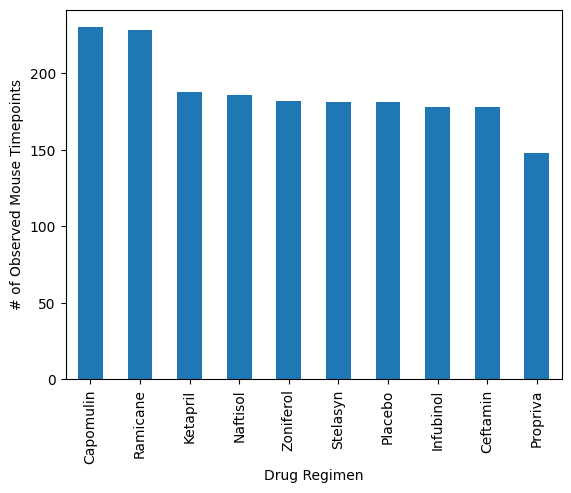

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
per_drug_mouse_count = cleaned_df['Drug Regimen'].value_counts()

# plotting and formatting 
pd_bar_plot = per_drug_mouse_count.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


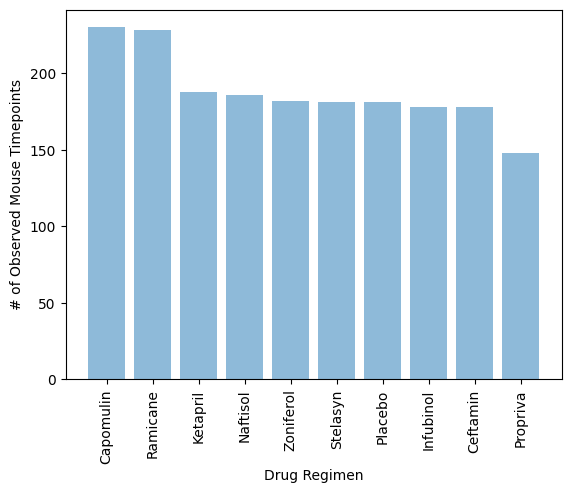

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
py_bar_x_axis = cleaned_df['Drug Regimen'].unique()
py_bar_y_axis = per_drug_mouse_count

# plotting and formatting 
tick_locations = [value for value in py_bar_x_axis]
plt.bar(py_bar_x_axis, py_bar_y_axis, alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'], rotation = 'vertical')
plt.show()
per_drug_mouse_count

Text(0, 0.5, 'Sex')

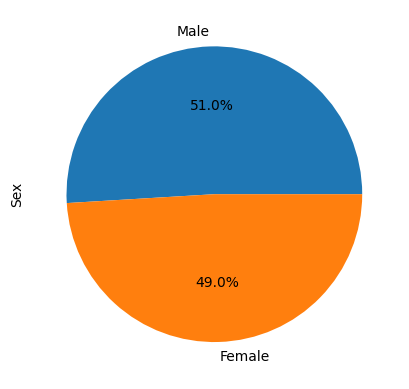

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
per_sex_mouse_count = cleaned_df['Sex'].value_counts()

# plotting and formatting 
pd_pie_plot = per_sex_mouse_count.plot.pie(autopct = '%1.1f%%')
plt.ylabel('Sex')

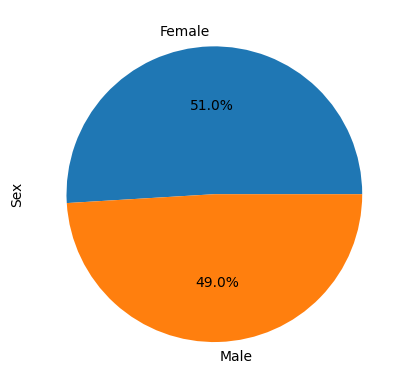

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_pie_values = cleaned_df['Sex'].value_counts()
py_pie_labels = ['Female', 'Male']

# plotting and formatting 
plt.pie(py_pie_values, labels = py_pie_labels, autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
# # DataFrame for sample drugs
sample_drugs = pd.DataFrame(cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') 
                                           | (cleaned_df['Drug Regimen'] == 'Ramicane') 
                                           | (cleaned_df['Drug Regimen'] == 'Infubinol') 
                                           | (cleaned_df['Drug Regimen'] == 'Ceftamin'), :])

# # Start by getting the last (greatest) timepoint for each mouse
sample_max_time = pd.DataFrame(sample_drugs.groupby(['Mouse ID', 'Drug Regimen']).max()['Timepoint'])
sample_max_time = sample_max_time.rename(columns = {'Timepoint': 'Max Timepoint'})

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# # I ended up merging the maximum values to a DF only containing the sample drug regimens. 
sample_merge = pd.merge(sample_drugs, sample_max_time, how = 'left', on = ['Mouse ID', 'Drug Regimen'])
sample_merge['Tumor Volume (mm3)'] = sample_merge['Tumor Volume (mm3)'].round(3)
sample_merge = sample_merge.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume'})

# # Find and store the final tumor volumes (added as new column in next merge)
final_volume = sample_merge.sort_values(['Timepoint'], ascending = False)
final_volume = final_volume.drop_duplicates(subset = ['Mouse ID', 'Drug Regimen'], keep = 'first')
final_volume = final_volume.loc[:, ['Mouse ID', 'Timepoint', 'Tumor Volume', 'Drug Regimen', 'Max Timepoint']]
final_volume = pd.DataFrame(final_volume)
final_volume = final_volume.rename(columns = {'Tumor Volume': 'Final Volume'})
final_volume = final_volume.loc[:, ['Mouse ID', 'Final Volume', 'Drug Regimen', 'Max Timepoint']]

# # merge round 2
sample_merge_two = pd.merge(sample_merge, final_volume, how = 'left', on = ['Mouse ID', 'Drug Regimen'])
sample_merge_two = sample_merge_two.sort_values(['Timepoint'], ascending = False)
final_sample_merge = sample_merge_two.drop_duplicates(subset = ['Mouse ID', 'Drug Regimen'], keep = 'first')

# # Display the resuling DF
final_sample_merge.head()

,Mouse ID,Timepoint,Tumor Volume,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint_x,Final Volume,Max Timepoint_y
813,p438,45,61.434,1,Ceftamin,Female,11,26,45,61.434,45
782,k403,45,22.050,1,Ramicane,Male,21,16,45,22.050,45
780,m546,45,30.565,1,Ramicane,Male,18,16,45,30.565,45
779,f345,45,60.919,1,Infubinol,Male,23,26,45,60.919,45
778,a203,45,67.973,2,Infubinol,Female,20,23,45,67.973,45


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
example_drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

for drug in example_drug_regimen:

# Create empty list to fill with tumor vol data (for plotting)
    tumor_data_volumes = []
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_on_drug_reg = final_sample_merge[final_sample_merge['Drug Regimen'] == drug]
    tumor_data_volumes.extend(mice_on_drug_reg['Final Volume'].tolist())
    
    # add subset 
    tumor_data_series = pd.Series(tumor_data_volumes)
    
    # Determine outliers using upper and lower bounds
    # find the quartiles and iqr
    first_quartile = tumor_data_series.quantile(0.25)
    third_quartile = tumor_data_series.quantile(0.75)
    iqr_for_drugs = third_quartile - first_quartile
    
    # identify the bounds
    lower_bound_drugs = first_quartile - (1.5 * iqr_for_drugs)
    upper_bound_drugs = third_quartile + (1.5 * iqr_for_drugs)
    
    # identify the outliers and print results
    outliers = tumor_data_series.loc[(tumor_data_series < lower_bound_drugs)]
    print(f"Outliers for {drug}: {outliers.tolist()}")


Outliers for Capomulin: []
Outliers for Ramicane: []
Outliers for Infubinol: [36.321]
Outliers for Ceftamin: []


In [15]:
# set up the individual drug data sets
capomulin = pd.DataFrame(final_sample_merge[final_sample_merge['Drug Regimen'] == 'Capomulin'])
ramicane = pd.DataFrame(final_sample_merge[final_sample_merge['Drug Regimen'] == 'Ramicane'])
infubinol = pd.DataFrame(final_sample_merge[final_sample_merge['Drug Regimen'] == 'Infubinol'])
ceftamin = pd.DataFrame(final_sample_merge[final_sample_merge['Drug Regimen'] == 'Ceftamin'])

# identify the tumor volumes of that data
capomulin_tumors = capomulin['Final Volume']
ramicane_tumors = ramicane['Final Volume']
infubinol_tumors = infubinol['Final Volume']
ceftamin_tumors = ceftamin['Final Volume']

# set up your plot points
plots = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]


[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

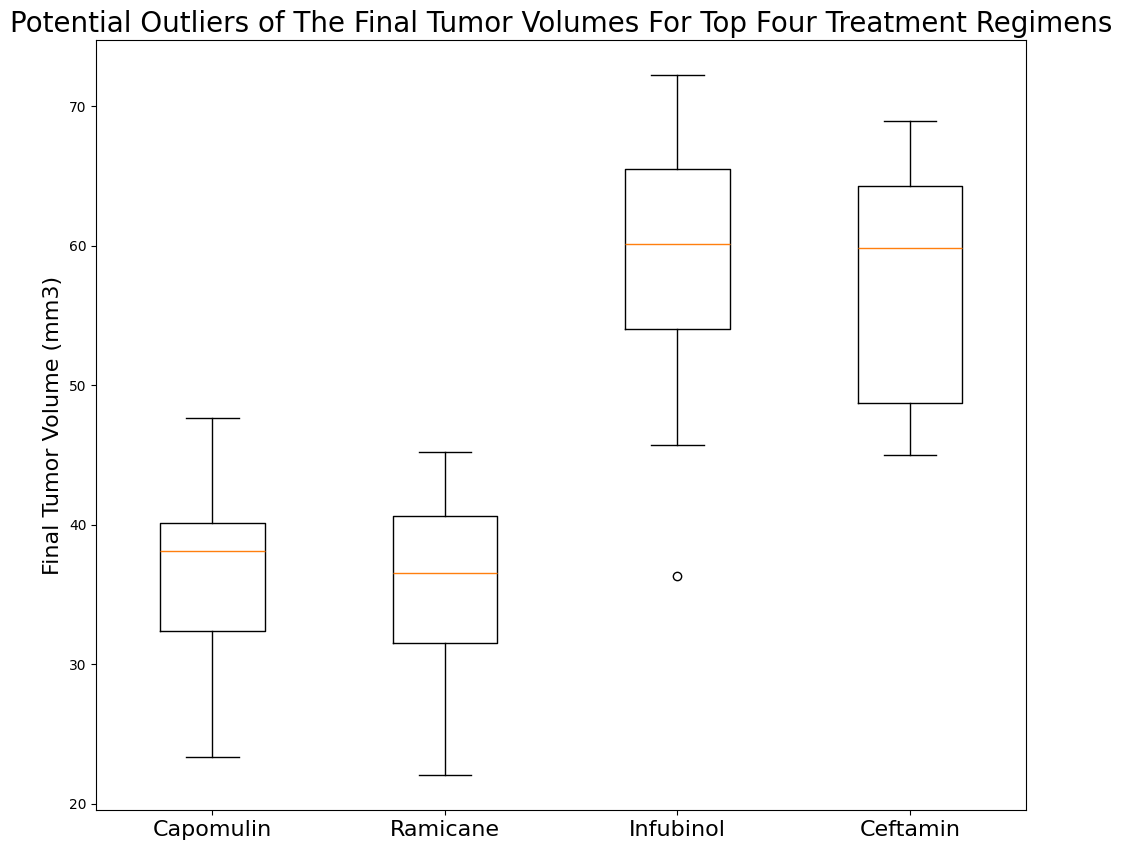

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# plotting and formatting 
fig, ax = plt.subplots(1, figsize = (12, 10))
ax.boxplot(plots)
ax.set_title('Potential Outliers of The Final Tumor Volumes For Top Four Treatment Regimens', fontsize=20)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=16, color='black')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=16, color='black')

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse x401')

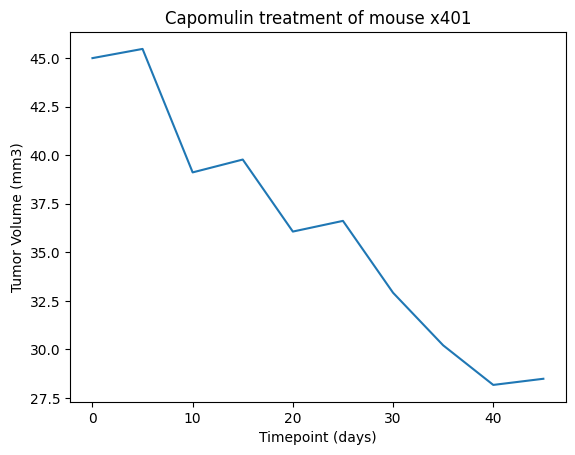

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Extracting data for a target mouse treated with Capomulin:
# identify the random mouse 
random_mouse = 'x401'
capomulin_random_mouse = sample_merge_two.loc[sample_merge_two['Mouse ID'] == random_mouse, :]
capomulin_random_mouse = capomulin_random_mouse.sort_values('Timepoint', ascending = True)
capomulin_random_mouse

# set the variables 
x_axis = capomulin_random_mouse['Timepoint']
y_axis = capomulin_random_mouse['Tumor Volume']

# plotting and formatting 
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {random_mouse}')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

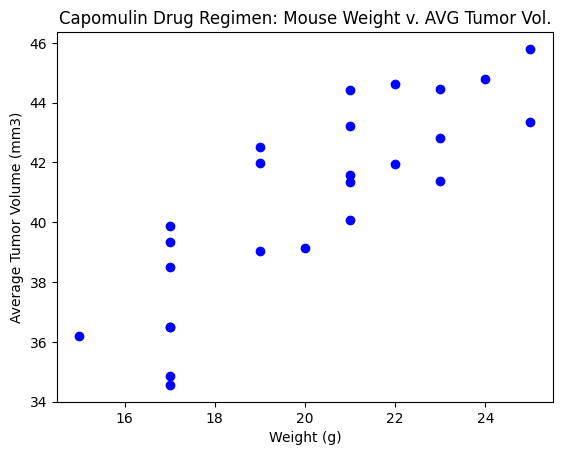

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# identify the capomulin average tumor data
capomulin_scatter_data = pd.DataFrame(sample_merge_two.loc[sample_merge_two['Drug Regimen'] == 'Capomulin', :])
avg_tumor_volume = pd.DataFrame(capomulin_scatter_data.groupby(['Mouse ID'])['Tumor Volume'].mean())
avg_tumor_volume = avg_tumor_volume.rename(columns = {'Tumor Volume': 'Average Tumor Volume'})
mouse_weight_capomulin = pd.DataFrame(capomulin_scatter_data[['Mouse ID', 'Weight (g)']].drop_duplicates(['Mouse ID']))
mouse_weight_capomulin = mouse_weight_capomulin.rename(columns = {'Weight (g)': 'Mouse Weight'})
final_scatter = pd.merge(mouse_weight_capomulin, avg_tumor_volume, how = 'left', on = 'Mouse ID')
final_scatter

# set the variables 
x_scatter = final_scatter['Mouse Weight']
y_scatter = final_scatter['Average Tumor Volume']

# plotting and formatting 
plt.scatter(x_scatter, y_scatter, marker = 'o', facecolors = 'blue')
plt.title('Capomulin Drug Regimen: Mouse Weight v. AVG Tumor Vol.')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

Correlation Coefficient: 0.8419


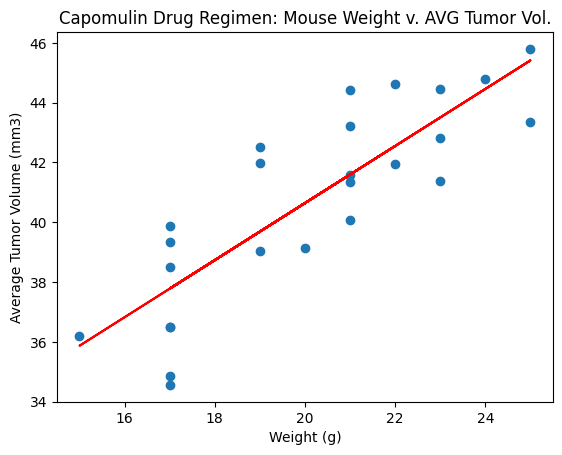

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, p_value = st.pearsonr(x_scatter, y_scatter)
correlation_coefficient = correlation_coefficient.round(4)
print("Correlation Coefficient:", correlation_coefficient)

# set up the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_scatter, y_scatter)
regress_values = x_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_scatter, y_scatter)
plt.plot(x_scatter,regress_values,"r-")

# formatting the linear regression model
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Capomulin Drug Regimen: Mouse Weight v. AVG Tumor Vol.')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()